In [1]:
pwd

'/vision2/u/ianhuang/VidObjClassHierarchy/viz/viz_data'

In [2]:
cd ../../

/vision2/u/ianhuang/VidObjClassHierarchy


In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import sys
sys.path.insert(0, 'utilities/obman_train')

In [4]:
cache_dir = 'cache'
image_dir = '/vision/group/EPIC-KITCHENS/EPIC_KITCHENS_2018.Bingbin/object_detection_images/train/'

In [6]:
foo = ['/'.join(filename.split('#')) for filename in os.listdir(os.path.join(cache_dir, 'unknown_object_detection'))]
foo = [os.path.join(image_dir,element[:-4]+'.jpg') for element in foo]

In [16]:
import random
image_name = foo[random.randint(0, len(foo)-1)]

## Plotting out image and hand bounding boxes

/vision/group/EPIC-KITCHENS/EPIC_KITCHENS_2018.Bingbin/object_detection_images/train/P22/P22_09/0000003781.jpg


Text(0.5, 1.0, 'confidence')

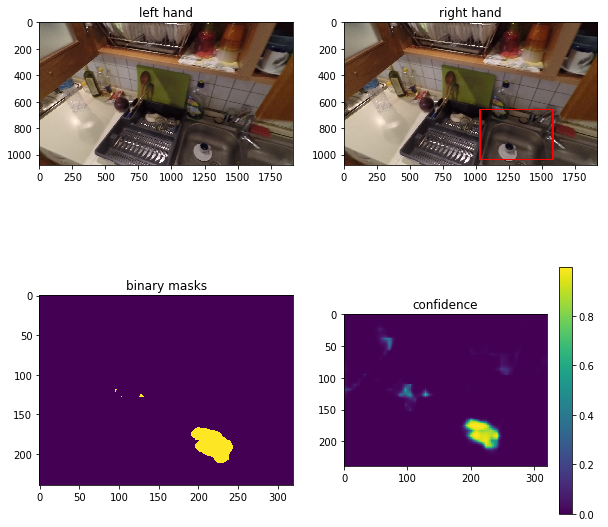

In [17]:
print(image_name)
image_mat = cv2.imread(image_name)
image_mat = cv2.cvtColor(image_mat, cv2.COLOR_BGR2RGB)

# import the right cache_file
save_name = os.path.join(os.path.join(cache_dir, 'hand_bounding_boxes'),
                ('#'.join(image_name.split('/')[-3:])[:-4])+'.pkl')
save_name_mask = os.path.join(os.path.join(cache_dir, 'handpose_estimation'),
                ('#'.join(image_name.split('/')[-3:])[:-4])+'.pkl')
with open(save_name, 'rb') as f:
    hand_bounding_boxes = pickle.load(f)

with open(save_name_mask, 'rb') as f:
    masks = pickle.load(f)
    
plotted = {}
for hand in hand_bounding_boxes['hand']:
    top_left = [int(hand_bounding_boxes['hand'][hand]['left_x']), int(hand_bounding_boxes['hand'][hand]['top_y'])]
    bottom_right = [int(hand_bounding_boxes['hand'][hand]['right_x']), int(hand_bounding_boxes['hand'][hand]['bottom_y'])]
    plotted[hand] = cv2.rectangle(image_mat.copy(), 
                              tuple(top_left), 
                              tuple(bottom_right), 
                              tuple([255,0,0]), 
                              thickness=10)
    
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax[0,0].set_title('left hand')
if 'left' in plotted:
    ax[0,0].imshow(plotted['left'])
else:
    ax[0,0].imshow(image_mat)
ax[0,1].set_title('right hand')
if 'right' in plotted:
    ax[0,1].imshow(plotted['right'])
else:
    ax[0,1].imshow(image_mat)
ax[1,0].imshow(masks['binary_mask'])
ax[1,0].set_title('binary masks')
im = ax[1,1].imshow(np.exp(masks['confidence'][:,:,1])/np.sum(np.exp(masks['confidence']), 2))
fig.colorbar(im)
ax[1,1].set_title('confidence')

## Plot out hand mesh and joints

In [18]:
from mano_train.visualize import displaymano

In [19]:
with open("utilities/obman_train/misc/mano/MANO_LEFT.pkl", "rb") as p_f:
    mano_right_data = pickle.load(p_f, encoding="latin1")
    faces = mano_right_data["f"]

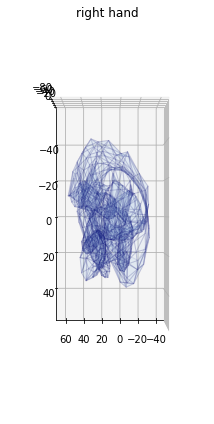

In [20]:
save_mesh_name = os.path.join(os.path.join(cache_dir, 'hand_mesh'),
                ('#'.join(image_name.split('/')[-3:])[:-4])+'.pkl')
with open(save_mesh_name, 'rb') as f:
    mesh_info = pickle.load(f)
    
fig = plt.figure(figsize=(6,6))
fig.clf()
counter = 1
for key_ in mesh_info:
    ax = fig.add_subplot(1, 2, counter, projection="3d")
    ax.title.set_text('{} hand'.format(key_))
    verts = mesh_info[key_]['verts']
    displaymano.add_mesh(ax, verts, faces, flip_x=(key_=='right'))
    counter += 1
plt.show()

## Plotting out object bounding boxes

In [21]:
save_object_det_name = os.path.join(os.path.join(cache_dir, 'unknown_object_detection'),
                ('#'.join(image_name.split('/')[-3:])[:-4])+'.pkl')
with open(save_object_det_name, 'rb') as f:
    object_det = pickle.load(f)
    

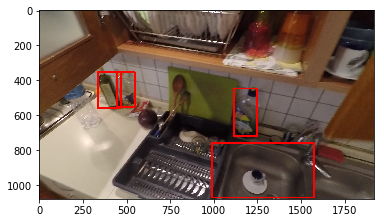

In [22]:
canvas = cv2.imread(image_name)
canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

for detection in object_det['bounding_boxes']:
    top_left = np.round(detection.numpy())[:2].tolist() 
    bottom_right = np.round(detection.numpy())[2:].tolist()
    top_left = [int(num) for num in top_left]
    bottom_right = [int(num) for num in bottom_right]
    canvas = cv2.rectangle(canvas,
                          tuple(top_left), 
                          tuple(bottom_right), 
                          tuple([255,0,0]), 
                          thickness=10)

plt.imshow(canvas)